In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df["Drug"].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

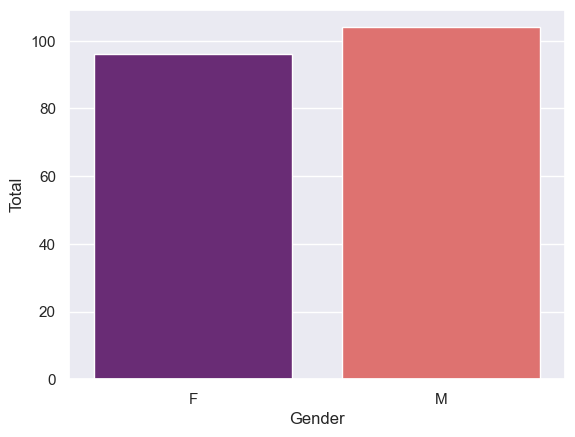

In [7]:
sns.set_theme(style = "darkgrid")
sns.countplot(data = df, x = "Sex", palette = "magma")
plt.xlabel("Gender")
plt.ylabel("Total")
plt.show()

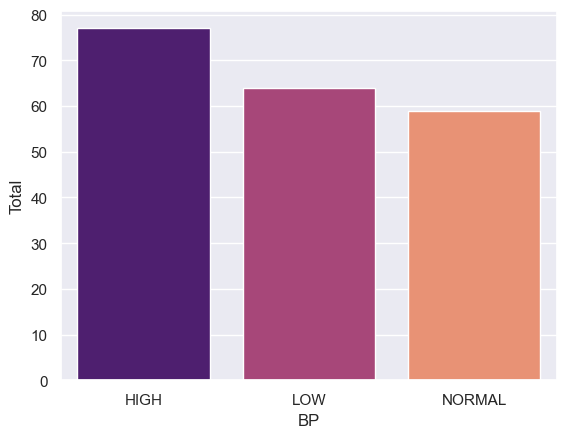

In [8]:
sns.set_theme(style = "darkgrid")
sns.countplot(data = df, x = "BP", palette = "magma")
plt.xlabel("BP")
plt.ylabel("Total")
plt.show()

In [9]:
df_num = df.select_dtypes(["int","float"])
df_num

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
...,...,...
195,56,11.567
196,16,12.006
197,52,9.894
198,23,14.020


In [10]:
df_cat = df.select_dtypes(["object"])
df_cat

,Sex,BP,Cholesterol,Drug
0,F,HIGH,HIGH,drugY
1,M,LOW,HIGH,drugC
2,M,LOW,HIGH,drugC
3,F,NORMAL,HIGH,drugX
4,F,LOW,HIGH,drugY
...,...,...,...,...
195,F,LOW,HIGH,drugC
196,M,LOW,HIGH,drugC
197,M,NORMAL,HIGH,drugX
198,M,NORMAL,NORMAL,drugX


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_cat:
    df_cat[i] = le.fit_transform(df_cat[i])
df_cat

,Sex,BP,Cholesterol,Drug
0,0,0,0,4
1,1,1,0,2
2,1,1,0,2
3,0,2,0,3
4,0,1,0,4
...,...,...,...,...
195,0,1,0,2
196,1,1,0,2
197,1,2,0,3
198,1,2,1,3


In [12]:
df_new = pd.concat([df_num,df_cat], axis = 1)
df_new

,Age,Na_to_K,Sex,BP,Cholesterol,Drug
0,23,25.355,0,0,0,4
1,47,13.093,1,1,0,2
2,47,10.114,1,1,0,2
3,28,7.798,0,2,0,3
4,61,18.043,0,1,0,4
...,...,...,...,...,...,...
195,56,11.567,0,1,0,2
196,16,12.006,1,1,0,2
197,52,9.894,1,2,0,3
198,23,14.020,1,2,1,3


In [13]:
x = df_new.iloc[:,:-1]
x

,Age,Na_to_K,Sex,BP,Cholesterol
0,23,25.355,0,0,0
1,47,13.093,1,1,0
2,47,10.114,1,1,0
3,28,7.798,0,2,0
4,61,18.043,0,1,0
...,...,...,...,...,...
195,56,11.567,0,1,0
196,16,12.006,1,1,0
197,52,9.894,1,2,0
198,23,14.020,1,2,1


In [14]:
y = df_new.iloc[:,-1]
y

0      4
1      2
2      2
3      3
4      4
      ..
195    2
196    2
197    3
198    3
199    3
Name: Drug, Length: 200, dtype: int32

In [15]:
# '''
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
for i in x:
    x[i] = sd.fit_transform(x[[i]])
x
# '''

,Age,Na_to_K,Sex,BP,Cholesterol
0,-1.291591,1.286522,-1.040833,-1.110169,-0.970437
1,0.162699,-0.415145,0.960769,0.109797,-0.970437
2,0.162699,-0.828558,0.960769,0.109797,-0.970437
3,-0.988614,-1.149963,-1.040833,1.329763,-0.970437
4,1.011034,0.271794,-1.040833,0.109797,-0.970437
...,...,...,...,...,...
195,0.708057,-0.626917,-1.040833,0.109797,-0.970437
196,-1.715759,-0.565995,0.960769,0.109797,-0.970437
197,0.465676,-0.859089,0.960769,1.329763,-0.970437
198,-1.291591,-0.286500,0.960769,1.329763,1.030464


In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state = 1)

# Trying Logistic model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
lr = LogisticRegression() # Bydefault solver = "lbfgs"
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
acc = accuracy_score(ytest, ypred)
print("The accuracy is", round(acc*100,2), "%")
print(classification_report(ytest, ypred))

The accuracy is 91.67 %
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.83      0.83      0.83         6
           2       1.00      0.75      0.86         4
           3       0.86      1.00      0.93        19
           4       1.00      0.89      0.94        27

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.93      0.92      0.92        60



# HyperTunning Logistic Model(For Multi class classification use newton-cg, lbfgs, sag, saga)

In [18]:
lr = LogisticRegression(solver = "newton-cg")
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
acc = accuracy_score(ytest, ypred)
print("The accuracy is", round(acc*100,2), "%")
print(classification_report(ytest, ypred))

The accuracy is 91.67 %
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.83      0.83      0.83         6
           2       1.00      0.75      0.86         4
           3       0.86      1.00      0.93        19
           4       1.00      0.89      0.94        27

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.93      0.92      0.92        60



In [19]:
lr = LogisticRegression(solver = "sag")
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
acc = accuracy_score(ytest, ypred)
print("The accuracy is", round(acc*100,2), "%")
print(classification_report(ytest, ypred))

The accuracy is 91.67 %
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.83      0.83      0.83         6
           2       1.00      0.75      0.86         4
           3       0.86      1.00      0.93        19
           4       1.00      0.89      0.94        27

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.93      0.92      0.92        60



In [20]:
lr = LogisticRegression(solver = "saga")
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
acc = accuracy_score(ytest, ypred)
print("The accuracy is", round(acc*100,2), "%")
print(classification_report(ytest, ypred))

The accuracy is 91.67 %
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.83      0.83      0.83         6
           2       1.00      0.75      0.86         4
           3       0.86      1.00      0.93        19
           4       1.00      0.89      0.94        27

    accuracy                           0.92        60
   macro avg       0.90      0.89      0.89        60
weighted avg       0.93      0.92      0.92        60



# Trying SVM model

In [23]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6
           2       1.00      0.75      0.86         4
           3       0.86      0.95      0.90        19
           4       0.96      0.93      0.94        27

    accuracy                           0.92        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.92      0.92        60



In [41]:
svc.score(xtrain, ytrain)

0.9785714285714285

In [49]:
# try kernel and c and gamma function.
svc = SVC(kernel = "linear", C = 100)
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        27

    accuracy                           0.98        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.99      0.98      0.98        60



In [50]:
svc.score(xtrain, ytrain)

1.0

# Trying Decision Tree model

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ac = accuracy_score(ytest, ypred)
print(f"The Accuracy is {ac}")
print(classification_report(ytest, ypred))

The Accuracy is 0.9833333333333333
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        27

    accuracy                           0.98        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.99      0.98      0.98        60



# Trying Ensemble model

In [37]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(LogisticRegression())
bg.fit(xtrain, ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.80      0.67      0.73         6
           2       1.00      0.75      0.86         4
           3       0.86      1.00      0.93        19
           4       1.00      0.89      0.94        27

    accuracy                           0.90        60
   macro avg       0.87      0.86      0.85        60
weighted avg       0.91      0.90      0.90        60



In [38]:
bg.score(xtrain,ytrain)

0.9571428571428572

In [39]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(DecisionTreeClassifier())
bg.fit(xtrain, ytrain)
ypred = bg.predict(xtest)
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        19
           4       1.00      1.00      1.00        27

    accuracy                           0.98        60
   macro avg       0.96      0.97      0.96        60
weighted avg       0.99      0.98      0.98        60



In [40]:
bg.score(xtrain,ytrain)

1.0